In [1]:
import pandas as pd
import numpy as np
#Vislization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import pandas_profiling as pp
#data Preprocessing
from sklearn.preprocessing import StandardScaler
#Data Splitting
from sklearn.model_selection import train_test_split
#Data Modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

In [2]:
data = pd.read_csv(r'C:\Users\dilpesh\Desktop\Datasets\udemy_courses.csv')

In [3]:
data

course_id                                       course_title  \
0       1070968                 Ultimate Investment Banking Course   
1       1113822  Complete GST Course & Certification - Grow You...   
2       1006314  Financial Modeling for Business Analysts and C...   
3       1210588  Beginner to Pro - Financial Analysis in Excel ...   
4       1011058       How To Maximize Your Profits Trading Options   
...         ...                                                ...   
3673     775618  Learn jQuery from Scratch - Master of JavaScri...   
3674    1088178  How To Design A WordPress Website With No Codi...   
3675     635248                      Learn and Build using Polymer   
3676     905096  CSS Animations: Create Amazing Effects on Your...   
3677     297602  Using MODX CMS to Build Websites: A Beginner's...   

                                                    url  is_paid  price  \
0     https://www.udemy.com/ultimate-investment-bank...     True    200   
1         https://www.udemy.com/goods-and-services-tax/     True     75   
2     https://www.udemy.com/financial-modeling-for-b...     True     45   
3     https://www.udemy.com/complete-excel-finance-c...     True     95   
4     https://www.udemy.com/how-to-maximize-your-pro...     True    200   
...                                                 ...      ...    ...   
3673  https://www.udemy.com/easy-jquery-for-beginner...     True    100   
3674  https://www.udemy.com/how-to-make-a-wordpress-...     True     25   
3675  https://www.udemy.com/learn-and-build-using-po...     True     40   
3676  https://www.udemy.com/css-animations-create-am...     True     50   
3677  https://www.udemy.com/using-modx-cms-to-build-...     True     45   

      num_subscribers  num_reviews  num_lectures               level  \
0                2147           23            51          All Levels   
1                2792          923           274          All Levels   
2                2174           74            51  Intermediate Level   
3                2451           11            36          All Levels   
4                1276           45            26  Intermediate Level   
...               ...          ...           ...                 ...   
3673             1040           14            21          All Levels   
3674              306            3            42      Beginner Level   
3675              513          169            48          All Levels   
3676              300           31            38          All Levels   
3677              901           36            20      Beginner Level   

      content_duration   published_timestamp           subject  
0                  1.5  2017-01-18T20:58:58Z  Business Finance  
1                 39.0  2017-03-09T16:34:20Z  Business Finance  
2                  2.5  2016-12-19T19:26:30Z  Business Finance  
3                  3.0  2017-05-30T20:07:24Z  Business Finance  
4                  2.0  2016-12-13T14:57:18Z  Business Finance  
...                ...                   ...               ...  
3673               2.0  2016-06-14T17:36:46Z   Web Development  
3674               3.5  2017-03-10T22:24:30Z   Web Development  
3675               3.5  2015-12-30T16:41:42Z   Web Development  
3676               3.0  2016-08-11T19:06:15Z   Web Development  
3677               2.0  2014-09-28T19:51:11Z   Web Development  

[3678 rows x 12 columns]

In [4]:
pp.ProfileReport(data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 247.9+ KB


In [6]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [7]:
data.describe()

course_id        price  num_subscribers   num_reviews  num_lectures  \
count  3.678000e+03  3678.000000      3678.000000   3678.000000   3678.000000   
mean   6.759720e+05    66.049483      3197.150625    156.259108     40.108755   
std    3.432732e+05    61.005755      9504.117010    935.452044     50.383346   
min    8.324000e+03     0.000000         0.000000      0.000000      0.000000   
25%    4.076925e+05    20.000000       111.000000      4.000000     15.000000   
50%    6.879170e+05    45.000000       911.500000     18.000000     25.000000   
75%    9.613555e+05    95.000000      2546.000000     67.000000     45.750000   
max    1.282064e+06   200.000000    268923.000000  27445.000000    779.000000   

       content_duration  
count       3678.000000  
mean           4.094517  
std            6.053840  
min            0.000000  
25%            1.000000  
50%            2.000000  
75%            4.500000  
max           78.500000

# How Many courses we have?

In [8]:
subject_col = data['subject'].value_counts()

In [9]:
subject_col

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

# How Many Category Variable we have?

In [10]:
category_df = data['subject'].unique()

In [11]:
category_df

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [12]:
data['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

# Vislizations_Plots

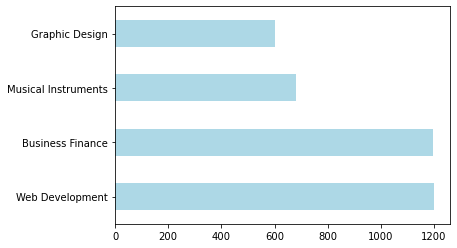

In [13]:
subject_col.plot.barh(color='lightblue');

c:\users\dilpesh\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


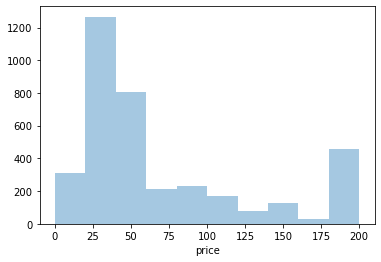

In [14]:
sns.distplot(data.price , bins=10, kde=False)

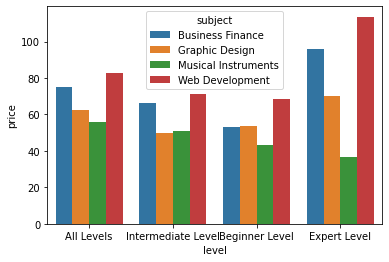

In [15]:
sns.barplot(x= 'level',y = "price", data= data, ci=None, hue='subject');

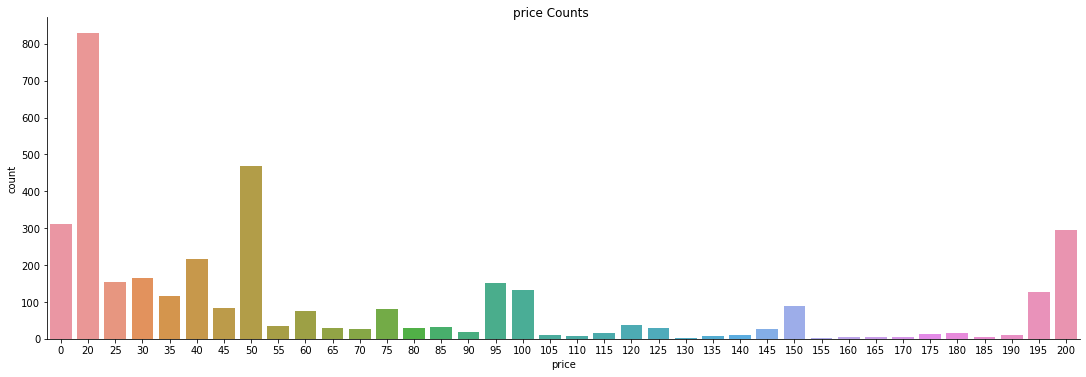

In [16]:
g = sns.catplot(x="price", aspect=3,ci=None,kind='count',data=data)
g.fig.suptitle("price Counts", y=1.0)
plt.show()

In [17]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

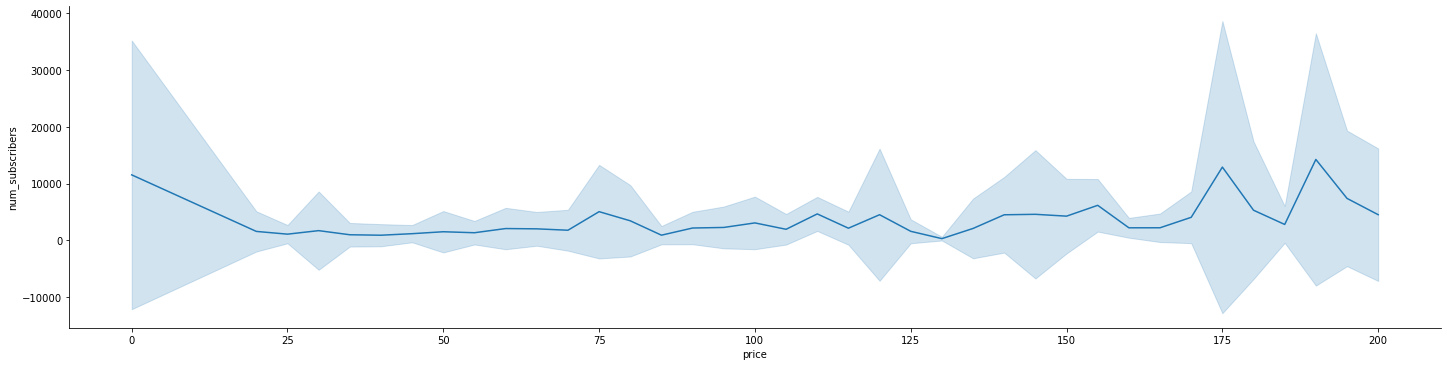

In [18]:
sns.relplot(x="price",y="num_subscribers",ci='sd',data=data,kind="line",aspect=4)

c:\users\dilpesh\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


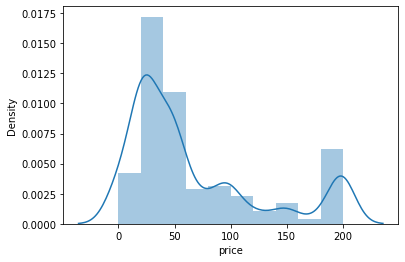

In [19]:
sns.distplot(data.price,bins=10)

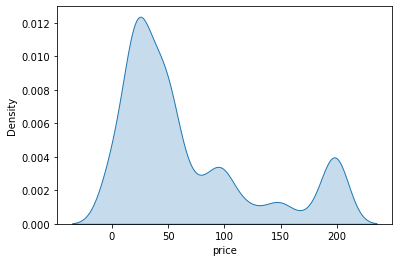

In [20]:
sns.kdeplot(data.price,shade=True)

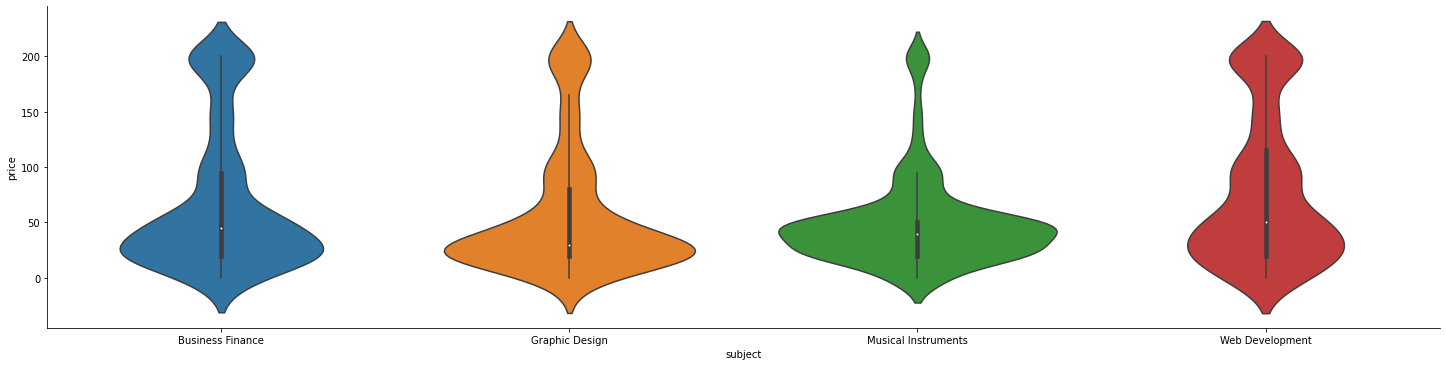

In [21]:
sns.catplot(x= "subject", y="price", kind="violin",aspect = 4,data=data)

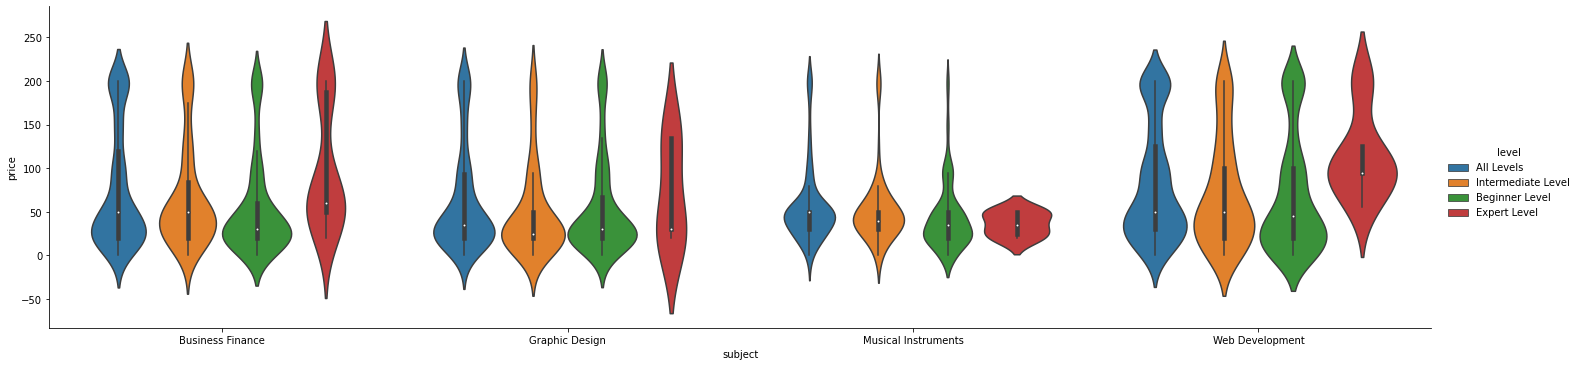

In [22]:
sns.catplot(x="subject", y="price", kind='violin',aspect=4,data=data,hue='level')

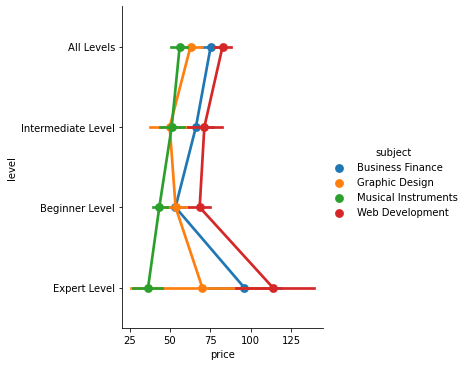

In [23]:
sns.catplot(x="price", y="level", hue="subject",kind="point",data=data)

# Vislization_Scatter

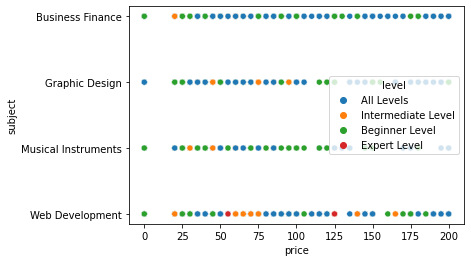

In [24]:
sns.scatterplot(x="price", y="subject",hue="level",data=data)

In [25]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

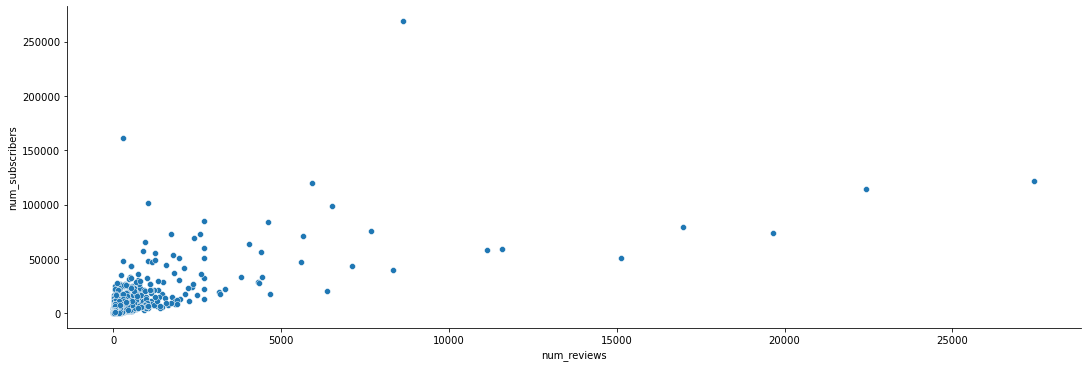

In [26]:
sns.relplot(x="num_reviews", y="num_subscribers",aspect=3,kind="scatter",data=data)

# Visulization_Heatmap

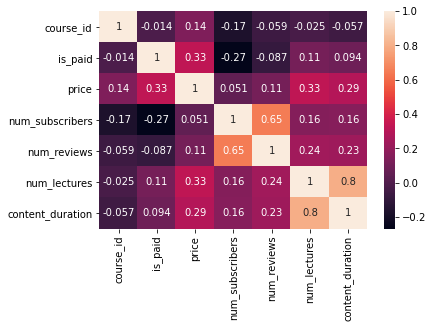

In [27]:
sns.set_palette("RdBu")
correlation = data.corr()
sns.heatmap(correlation,annot=True)
plt.show()

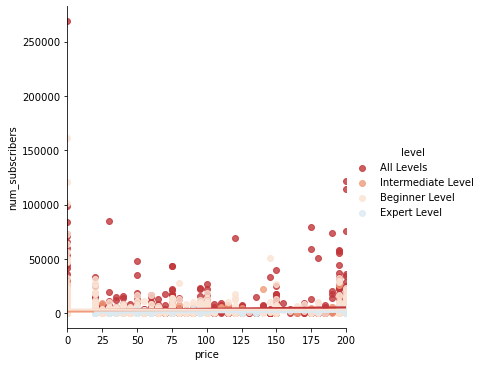

In [28]:
sns.lmplot(x="price", y="num_subscribers",data=data,hue="level")

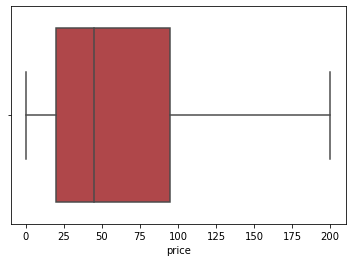

In [29]:
sns.boxplot(x = data['price'])

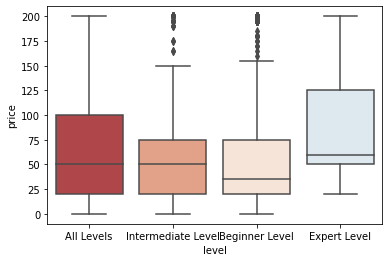

In [30]:
sns.boxplot(x = "level", y = "price", data=data)

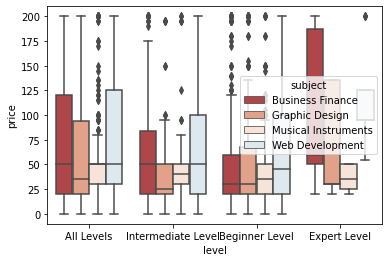

In [31]:
sns.boxplot(x = "level", y = "price", hue = "subject", data=data)

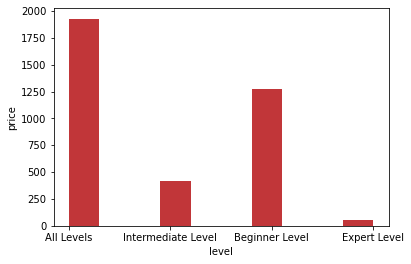

In [32]:
fig , ax = plt.subplots()
ax.hist(data.level,label = "price", bins= 10)
ax.set_xlabel("level")
ax.set_ylabel("price")
plt.show()

# is_paid categorical variable frequency

In [33]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

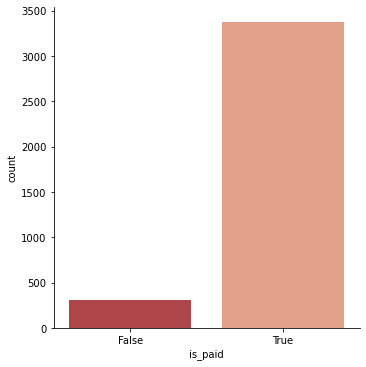

In [34]:
sns.catplot(x = "is_paid", data = data,kind= "count")
plt.show()

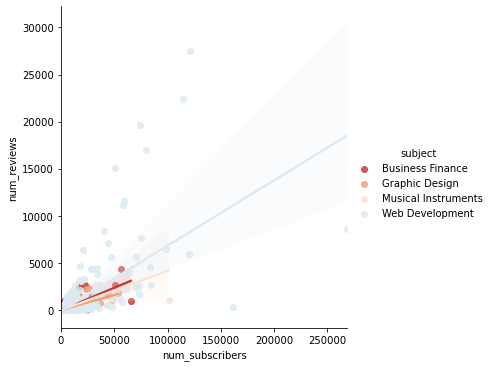

In [35]:
sns.lmplot(x = "num_subscribers", y = "num_reviews", hue = "subject",data=data)

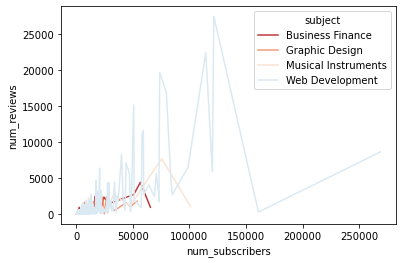

In [36]:
sns.lineplot(x = "num_subscribers", y = "num_reviews", hue = "subject",data=data)

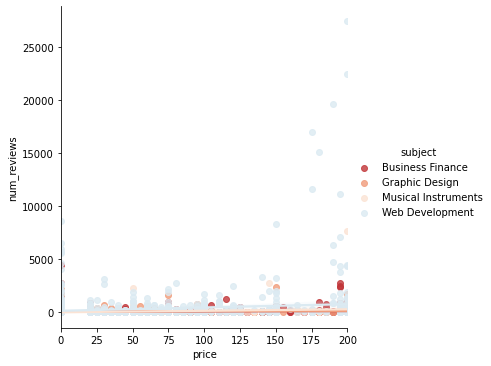

In [37]:
sns.lmplot(x = "price", y = "num_reviews", hue = "subject",data=data)

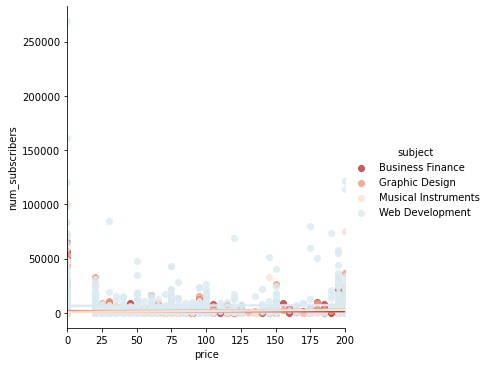

In [38]:
sns.lmplot(x = "price", y = "num_subscribers", hue = "subject",data=data)

# Preproccessing 

# How to Label encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data["level"])

LabelEncoder()

# one hot Coding

In [40]:
pd.get_dummies(data["level"])

All Levels  Beginner Level  Expert Level  Intermediate Level
0              1               0             0                   0
1              1               0             0                   0
2              0               0             0                   1
3              1               0             0                   0
4              0               0             0                   1
...          ...             ...           ...                 ...
3673           1               0             0                   0
3674           0               1             0                   0
3675           1               0             0                   0
3676           1               0             0                   0
3677           0               1             0                   0

[3678 rows x 4 columns]

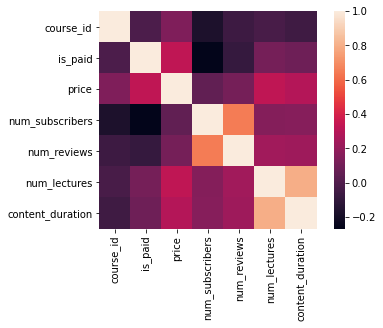

In [41]:
Data1= data[['is_paid','price','num_subscribers','num_reviews','num_lectures','content_duration','subject']] #Subsetting the data
cor = data.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

In [42]:
Data1.head()

is_paid  price  num_subscribers  num_reviews  num_lectures  \
0     True    200             2147           23            51   
1     True     75             2792          923           274   
2     True     45             2174           74            51   
3     True     95             2451           11            36   
4     True    200             1276           45            26   

   content_duration           subject  
0               1.5  Business Finance  
1              39.0  Business Finance  
2               2.5  Business Finance  
3               3.0  Business Finance  
4               2.0  Business Finance

In [43]:
subject = {'Web Development': 1 ,'Business Finance': 2, 'Musical Instruments': 3, 'Graphic Design': 4} 
Data1.subject = [subject[item] for item in Data1.subject] 
print(Data1)

      is_paid  price  num_subscribers  num_reviews  num_lectures  \
0        True    200             2147           23            51   
1        True     75             2792          923           274   
2        True     45             2174           74            51   
3        True     95             2451           11            36   
4        True    200             1276           45            26   
...       ...    ...              ...          ...           ...   
3673     True    100             1040           14            21   
3674     True     25              306            3            42   
3675     True     40              513          169            48   
3676     True     50              300           31            38   
3677     True     45              901           36            20   

      content_duration  subject  
0                  1.5        2  
1                 39.0        2  
2                  2.5        2  
3                  3.0        2  
4            

c:\users\dilpesh\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [44]:
print("Any missing sample in test set:",Data1.isnull().values.any(), "\n")

Any missing sample in test set: False 



In [45]:
y = Data1['is_paid']
X = Data1.drop(columns=['is_paid'])

In [46]:
# X_train, y_train,X_test,y_test = train_test_split(X,y,test_size=0.2,random_state=9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [47]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Modeling

In [48]:
# X = data["num_subscribers"].values
# y = data["num_reviews"].values

In [49]:
# print(X.shape)
# print(y.shape)

In [50]:
# X = X.reshape(-1,1)
# y = y.reshape(-1,1)

In [51]:
# X_train, y_train,X_test,y_test = train_test_split(X,y,test_size=0.2,random_state=9)

# Logistic Regression

In [52]:
# # from sklearn.linear_model import LinearRegression
# m1 = 'Logistic Regression'
# lr = LogisticRegression()
# model = lr.fit(X_train, y_train)
# lr_predict = lr.predict(X_test)
# lr_conf_matrix = confusion_matrix(y_test, lr_predict)
# lr_acc_score = accuracy_score(y_test, lr_predict)
# # preds = reg.predict(X_test)
# # rmse = np.sqrt(mean_squared_error(y_test,preds))
# # print("rmse")
# print("confussion matrix")
# # print(rmse)
# print(lr_conf_matrix)
# print("\n")
# print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
# print(classification_report(y_test,lr_predict))
# # from sklearn.linear_model import LinearRegression
# # reg = LinearRegression()

# # reg.fit(X_train,y_train)
# # preds = reg.predict(X_test)
# # rmse = np.sqrt(mean_squared_error(y_test,preds))
# # print(rmse)
# # print('Score',reg.score(X_test,y_test))

In [53]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix
m3 = 'Random Forest Classfier'
rd = RandomForestClassifier(n_estimators=100,random_state=49,n_jobs=-1)
rd.fit(X_train,y_train)
rd_predicted = rd.predict(X_test)
rd_conf_matrix = confusion_matrix(y_test,rd_predicted)
rd_acc_score = accuracy_score(y_test,rd_predicted)
print("confusion Matrix")
print(rd_conf_matrix)
print("\n")
print('Accuracy of Random Forest Classifier',rd_acc_score * 100,'\n')
print(classification_report(y_test,rd_predicted))


confusion Matrix
[[ 77   0]
 [  0 659]]


Accuracy of Random Forest Classifier 100.0 

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        77
        True       1.00      1.00      1.00       659

    accuracy                           1.00       736
   macro avg       1.00      1.00      1.00       736
weighted avg       1.00      1.00      1.00       736



In [72]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix

# # We define the model
# rfcla = RandomForestClassifier(n_estimators=100,random_state=49,n_jobs=-1)

# # We train model
# rfcla.fit(X_train, y_train)

# # We predict target values
# Y_predict5 = rfcla.predict(X_test)

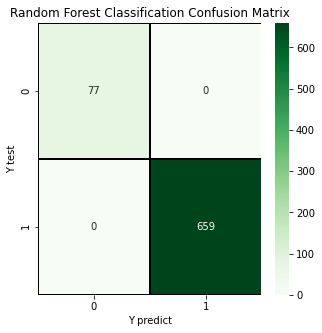

In [54]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rd_conf_matrix, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="Greens")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [55]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[ 77   0]
 [  0 659]]


Accuracy of Logistic Regression: 100.0 

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        77
        True       1.00      1.00      1.00       659

    accuracy                           1.00       736
   macro avg       1.00      1.00      1.00       736
weighted avg       1.00      1.00      1.00       736



c:\users\dilpesh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


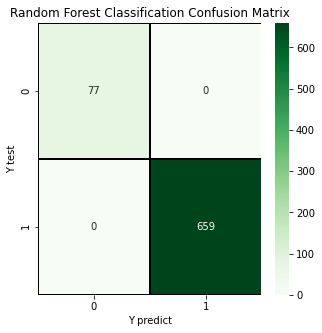

In [56]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lr_conf_matrix, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="Greens")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [57]:
m4 = 'Naive Bayes'
nb = GaussianNB()
model = nb.fit(X_train,y_train)
ndrep = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test,ndrep)
nb_acc_score = accuracy_score(y_test,ndrep)
print("confusion Matrix")
print(nb_conf_matrix)
print("\n")
print('Accuracy for Navie Model is :', nb_acc_score * 100,'\n')
print(classification_report(y_test,ndrep))

confusion Matrix
[[ 73   4]
 [  0 659]]


Accuracy for Navie Model is : 99.45652173913044 

              precision    recall  f1-score   support

       False       1.00      0.95      0.97        77
        True       0.99      1.00      1.00       659

    accuracy                           0.99       736
   macro avg       1.00      0.97      0.99       736
weighted avg       0.99      0.99      0.99       736



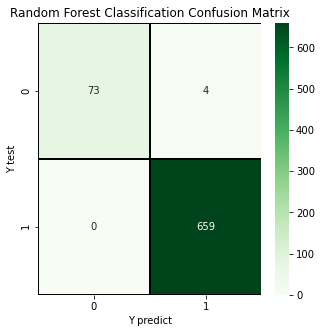

In [58]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nb_conf_matrix, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="Greens")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [59]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[ 13  64]
 [ 10 649]]


Accuracy of K-NeighborsClassifier: 89.94565217391305 

              precision    recall  f1-score   support

       False       0.57      0.17      0.26        77
        True       0.91      0.98      0.95       659

    accuracy                           0.90       736
   macro avg       0.74      0.58      0.60       736
weighted avg       0.87      0.90      0.87       736



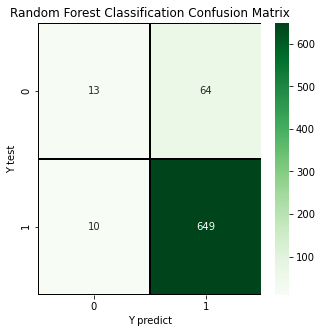

In [60]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_conf_matrix, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="Greens")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [61]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth=6)
dt.fit(X_train,y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test,dt_predicted)
dt_acc_score = accuracy_score(y_test,dt_predicted)
print("confusion Matrix")
print(dt_conf_matrix)
print("\n")
print('Accuracy for Decision Tree Classifier :',dt_acc_score * 100,'\n')
print(classification_report(y_test,dt_predicted))

confusion Matrix
[[ 77   0]
 [  0 659]]


Accuracy for Decision Tree Classifier : 100.0 

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        77
        True       1.00      1.00      1.00       659

    accuracy                           1.00       736
   macro avg       1.00      1.00      1.00       736
weighted avg       1.00      1.00      1.00       736



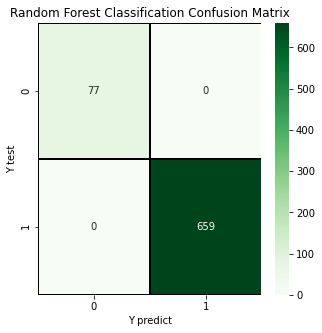

In [62]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dt_conf_matrix, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="Greens")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [63]:
m7 = 'Support Vector Classifier'
svc = SVC(kernel='rbf',C=2)
svc.fit(X_train,y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test,svc_predicted)
svc_acc_score = accuracy_score(y_test,svc_predicted)
print("confusion Matrix")
print(svc_conf_matrix)
print("\n")
print('Accuracy of Support Vector Classifier :',svc_acc_score * 100, '\n')
print(classification_report(y_test,svc_predicted))

confusion Matrix
[[  2  75]
 [  0 659]]


Accuracy of Support Vector Classifier : 89.80978260869566 

              precision    recall  f1-score   support

       False       1.00      0.03      0.05        77
        True       0.90      1.00      0.95       659

    accuracy                           0.90       736
   macro avg       0.95      0.51      0.50       736
weighted avg       0.91      0.90      0.85       736



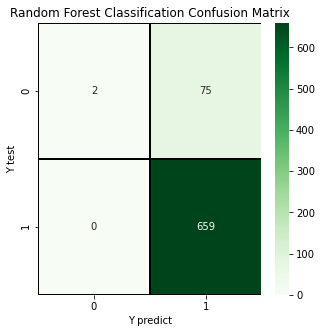

In [64]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svc_conf_matrix, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="Greens")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [65]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rd_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

Model    Accuracy
0     Logistic Regression  100.000000
1             Naive Bayes   99.456522
2           Random Forest  100.000000
3     K-Nearest Neighbour   89.945652
4           Decision Tree  100.000000
5  Support Vector Machine   89.809783

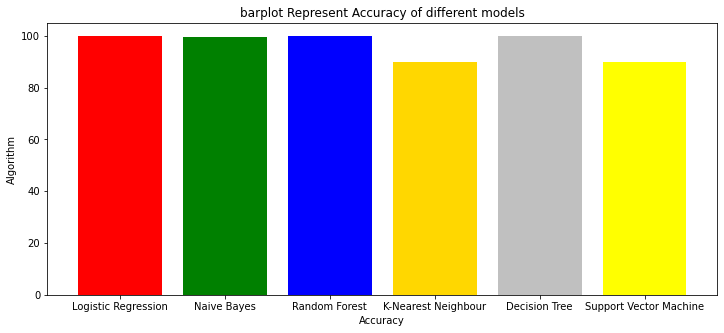

In [66]:
colors = ['red','green','blue','gold','silver','yellow','orange']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy")
plt.ylabel("Algorithm")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()
          

In [67]:
scv = StackingCVClassifier(classifiers=[knn,svc],meta_classifier = svc,random_state=42)
svc.fit(X_train,y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test,svc_predicted)
svc_acc_score = accuracy_score(y_test,svc_predicted)
print("confusion Matrix")
print(svc_conf_matrix)
print("\n")
print('Accuracy of Stacking Classifier :', svc_acc_score * 100,'\n')
print(classification_report(y_test,svc_predicted))

confusion Matrix
[[  2  75]
 [  0 659]]


Accuracy of Stacking Classifier : 89.80978260869566 

              precision    recall  f1-score   support

       False       1.00      0.03      0.05        77
        True       0.90      1.00      0.95       659

    accuracy                           0.90       736
   macro avg       0.95      0.51      0.50       736
weighted avg       0.91      0.90      0.85       736



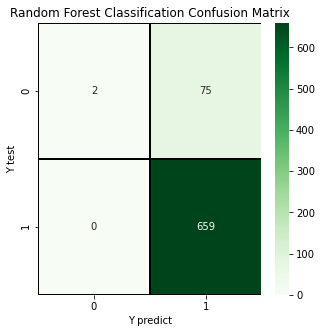

In [68]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svc_conf_matrix, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="Greens")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()